In [1]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

df.head()


Saving superstore.csv to superstore.csv


,OrderID,Region,Category,Segment,Sales,Profit,Discount,Quantity
0,1,Central,Technology,Corporate,495.42,-21.89,0.07,6
1,2,South,Furniture,Consumer,388.21,50.54,0.04,3
2,3,West,Furniture,Consumer,399.61,-43.48,0.26,3
3,4,Central,Technology,Corporate,131.24,-33.67,0.17,7
4,5,Central,Furniture,Corporate,135.01,-10.37,0.02,6


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [3]:
numeric_cols = ['Sales', 'Profit', 'Discount', 'Quantity']
group_col = 'Region'


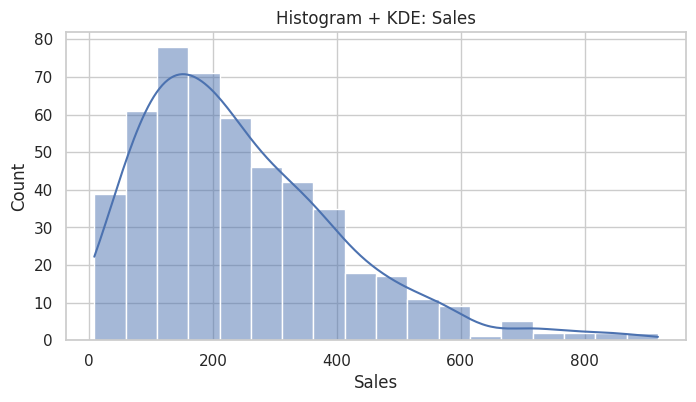

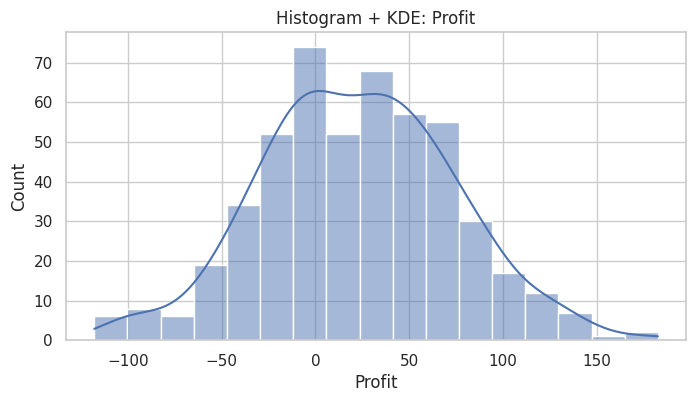

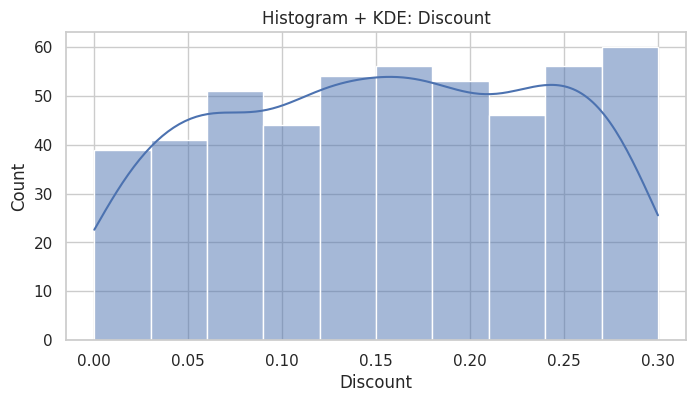

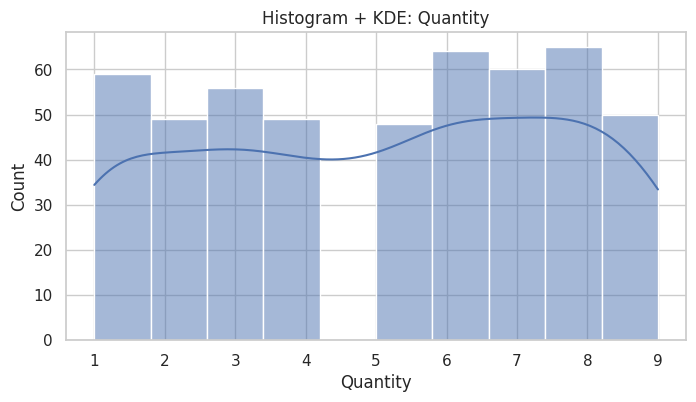

In [4]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram + KDE: {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


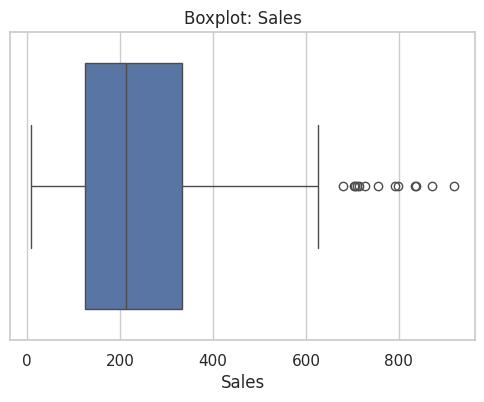

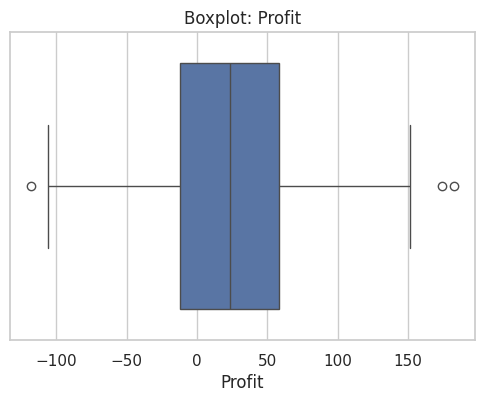

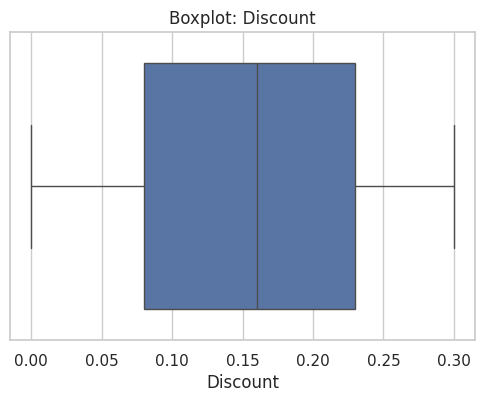

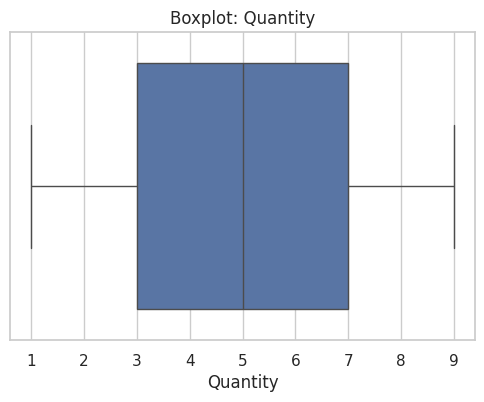

In [5]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()


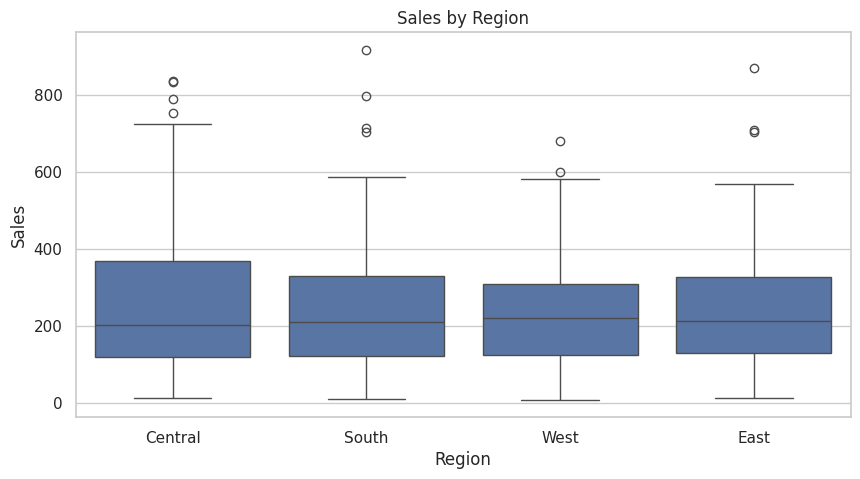

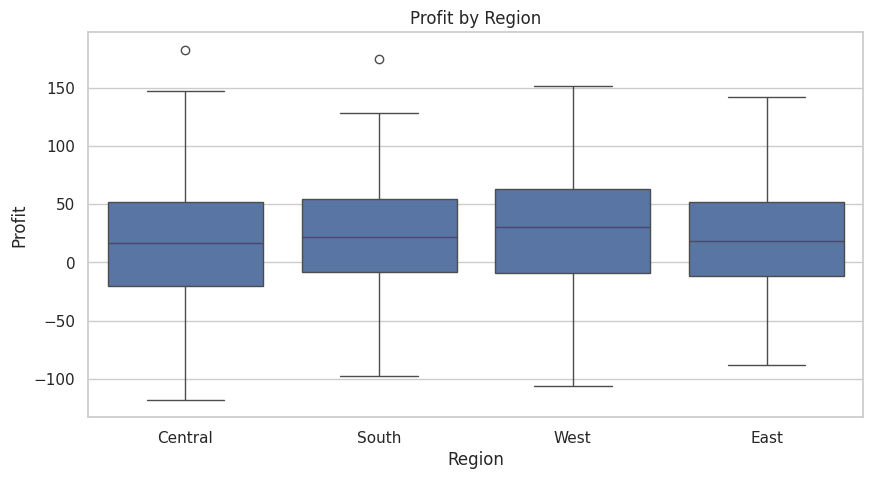

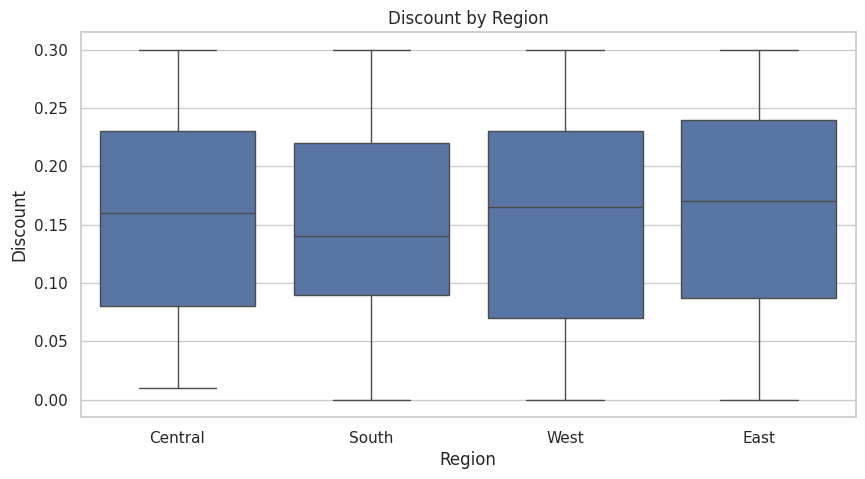

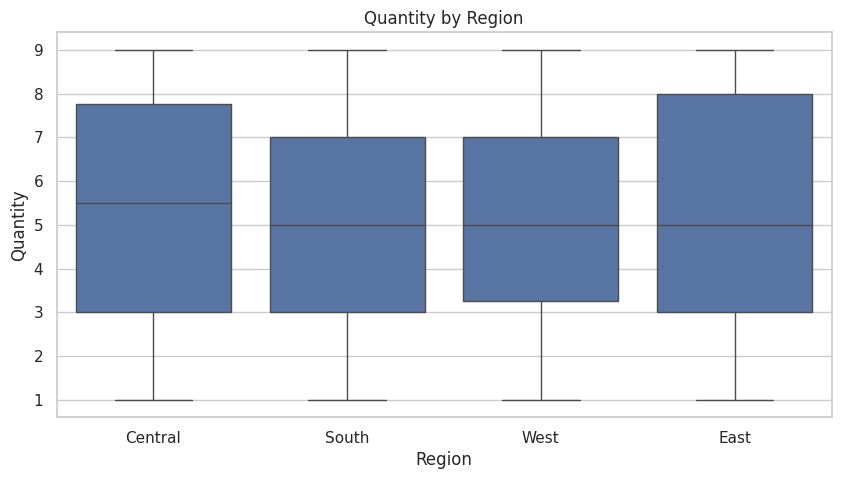

In [6]:
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=group_col, y=col, data=df)
    plt.title(f'{col} by {group_col}')
    plt.show()


In [7]:
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (df[col] < lower) | (df[col] > upper)
    outlier_rows = df.loc[mask, [col, group_col]]

    print(f"Outliers for {col}:")
    display(outlier_rows)
    print("="*50)

    outliers[col] = outlier_rows


Outliers for Sales:


,Sales,Region
89,871.87,East
105,703.41,East
128,704.67,South
143,918.23,South
177,754.40,Central
181,837.08,Central
215,680.08,West
272,715.05,South
285,790.46,Central
311,726.25,Central


Outliers for Profit:


,Profit,Region
58,-117.98,Central
267,174.36,South
340,182.73,Central


Outliers for Discount:


,Discount,Region


Outliers for Quantity:


,Quantity,Region


In [8]:
df[numeric_cols].skew()


,0
Sales,1.157092
Profit,0.050771
Discount,-0.071490
Quantity,-0.092708
